# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn
# Курсовой Проект Ершова Андрея Александровича

In [169]:
import warnings

warnings.filterwarnings('ignore')

In [170]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

pd.options.display.max_columns = 100

In [171]:
TRAIN_MODEL_PATH = 'c:\\Users\\andre\\source\\repos\\python\\DataScience\\project_task\\train.csv'
TEST_MODEL_PATH = 'c:\\Users\\andre\\source\\repos\\python\\DataScience\\project_task\\test.csv'

In [172]:
df = pd.read_csv(TRAIN_MODEL_PATH)
df = df.set_index('Id')

###### Описание датасета:

$Id$ : идентификационный номер квартиры
<br>
$DistrictId$ : идентификационный номер района
<br>
$Rooms$ : количество комнат
<br>
$Square$ : площадь
<br>
$LifeSquare$ : жилая площадь
<br>
$KitchenSquare$ : площадь кухни
<br>
$Floor$ : этаж
<br>
$HouseFloor$ : количество этажей в доме
<br>
$HouseYear$ : год постройки дома
<br>
$Ecology\_1, Ecology\_2, Ecology\_3$ : экологические показатели местности
<br>
$Social\_1, Social\_2, Social\_3$ : социальные показатели местности
<br>
$Healthcare\_1, Helthcare\_2$ : показатели местности, связанные с охраной здоровья
<br>
$Shops\_1, Shops\_2$ : показатели, связанные с наличием магазинов, торговых центров
<br>
$Price$ : цена квартиры

In [173]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(3)
memory usage: 1.5+ MB


#### Библиотечные функции

In [175]:
def getStatisticsByColumn(columnName, sortName='Count', asc=True):
    group = df.groupby(columnName)
    df_stat = pd.DataFrame(group.apply(lambda x: x[columnName].unique()[0]))
    df_stat.columns = [columnName]
    df_stat.loc[:,'Count'] = group.apply(lambda x: x[columnName].count())
    df_stat.reset_index(inplace=True, drop=True)
    return df_stat.sort_values(by=sortName, axis=0, ascending=asc)

In [176]:
def fillEmptyObservationsByMedian(columnName):
    mdn = df[columnName].median()
    df[columnName] = df[columnName].fillna(mdn)
    return 0

In [177]:
def transformCategorialToBinary(dFrame, columnName):
    matching = filter(lambda column: columnName in column, dFrame.columns)

    if len(list(matching)) > 0:
        dFrame = pd.concat([dFrame, pd.get_dummies(dFrame[columnName])], axis=1)
        dFrame.rename(columns={"A": columnName + "A", "B": columnName + "B"}, inplace=True)
        dFrame.drop(columnName, axis=1, inplace=True)
    return dFrame

Нормализация поля $DistrictId$

In [178]:
print(getStatisticsByColumn('DistrictId')[:10])

     DistrictId  Count
204         209      1
202         207      1
201         205      1
117         117      1
197         199      1
196         196      1
174         174      1
200         202      2
203         208      2
195         195      2


In [179]:
df.loc[df.DistrictId == 0, 'DistrictId'] = df.DistrictId.median()

Нормализация поля $Rooms$

In [180]:
print(getStatisticsByColumn('Rooms')[:10])

   Rooms   Count
6    6.0     1.0
8   19.0     1.0
7   10.0     2.0
0    0.0     8.0
5    5.0    18.0
4    4.0   150.0
3    3.0  2235.0
1    1.0  3705.0
2    2.0  3880.0


In [181]:
df.Rooms = df.Rooms.astype(int)

In [182]:
print('средний метраж для однушек:   ', df.loc[df['Rooms'] == 1].median()['Square'])
print('средний метраж для двушек:    ', df.loc[df['Rooms'] == 2].median()['Square'])
print('средний метраж для трёшек:    ', df.loc[df['Rooms'] == 3].median()['Square'])
print('средний метраж для четвёрок:  ', df.loc[df['Rooms'] == 4].median()['Square'])
print('средний метраж для пятёрок:   ', df.loc[df['Rooms'] == 5].median()['Square'])
print('средний метраж для шестёрок:  ', df.loc[df['Rooms'] == 6].median()['Square'])

средний метраж для однушек:    40.40658991236909
средний метраж для двушек:     55.84181213903055
средний метраж для трёшек:     77.41364294803941
средний метраж для четвёрок:   98.66805357992513
средний метраж для пятёрок:    116.08486083443316
средний метраж для шестёрок:   59.41433379627719


In [183]:
df.loc[df.Rooms == 6] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14003,99.0,6,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


Корректировка количества комнат на основании средних значений метража

In [184]:
df.loc[df.Id == 12638, 'Rooms'] = 5
df.loc[df.Id == 7917, 'Rooms'] = 10
df.loc[df.Id == 7317, 'Rooms'] = 1
df.loc[df.Id == 770, 'Rooms'] = 1
df.loc[df.Id == 456, 'Rooms'] = 3
df.loc[df.Id == 3159, 'Rooms'] = 1
df.loc[df.Id == 9443, 'Rooms'] = 3
df.loc[df.Id == 8491, 'Rooms'] = 1
df.loc[df.Id == 5927, 'Rooms'] = 2
df.loc[df.Id == 14865, 'Rooms'] = 1
df.loc[df.Id == 7594, 'Rooms'] = 1
df.loc[df.Id == 14003, 'Rooms'] = 2

AttributeError: 'DataFrame' object has no attribute 'Id'

Нормализация поля $Square$

In [185]:
df.loc[(df.Square < 10)] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
1748,88.0,2,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
11526,27.0,1,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
10202,6.0,1,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
10527,27.0,1,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
9487,5.0,1,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
3224,27.0,0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4504,27.0,3,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
14786,1.0,1,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
13265,1.0,3,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


Невеверные значения, подлежащие удалению

In [186]:
df.drop(df[(df.Square < 10) & (df.Square < df.LifeSquare)].index, inplace=True)

Невеверные значения, подлежащие коррекции

In [187]:
df.loc[(df.Square < 10), 'Square'] = df.loc[(df.Square < 10), 'Square'] * 10
df.loc[(df.Square < 10), 'LifeSquare'] = df.loc[(df.Square < 10), 'LifeSquare'] * 10

Нормализация поля $LifeSquare$
<br>
<br>
Признак $LifeSquare$ имеeт высокую степень разряжения.
<br>
Заполняем отсутсвующие в этом столбце значения соотвествующими медианными значениями. 

In [188]:
fillEmptyObservationsByMedian('LifeSquare')

0

In [189]:
df.loc[(df.LifeSquare < 10)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
4378,27.0,3,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
4280,34.0,2,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
12613,6.0,2,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
16779,27.0,3,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,174687.566186
3522,6.0,1,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,27.0,2,58.943039,3.319486,1.0,11,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B,142789.948977
2040,62.0,1,122.438148,5.751401,1.0,2,3.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,224900.897679
13630,24.0,3,127.141143,4.811405,1.0,3,1.0,2017,0.111627,B,B,50,12238,8,1970.0,2,3,B,611250.912034


Невеверные значения, подлежащие коррекции (при необходимости, повторить)

In [190]:
df.loc[(df.LifeSquare < 10), 'LifeSquare'] = df.loc[(df.LifeSquare < 10), 'LifeSquare'] * 10
df.loc[(df.LifeSquare < 10), 'LifeSquare'] = df.loc[(df.LifeSquare < 10), 'LifeSquare'] * 10

In [191]:
df.loc[df.LifeSquare > 5000, 'LifeSquare'] = df.LifeSquare.median()

Нормализация поля $KitchenSquare$

In [192]:
df.loc[(df.KitchenSquare == 0)] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
4765,53.0,2,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
11993,74.0,2,80.312926,32.784434,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
6641,54.0,3,118.907612,32.784434,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
4378,27.0,3,106.958871,64.182211,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
9371,23.0,2,60.503248,32.784434,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,1.0,2,66.736039,32.784434,0.0,16,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,199237.847364
5365,1.0,2,61.049491,32.784434,0.0,11,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,190085.168584
9307,1.0,2,57.376642,32.784434,0.0,8,25.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,104450.496477


Невеверные значения, подлежащие коррекции

In [193]:
df.loc[(df.KitchenSquare == 0), 'KitchenSquare'] = df.KitchenSquare.median()
df.loc[(df.KitchenSquare > df.LifeSquare), 'KitchenSquare'] = df.KitchenSquare.median()

Нормализация поля $Floor$

In [194]:
df.loc[(df.Floor > 100)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


Нормализация поля $HouseFloor$

In [195]:
df.HouseFloor = df.HouseFloor.astype(int)

In [196]:
print(getStatisticsByColumn('HouseFloor', 'HouseFloor', False)[:10])

    HouseFloor  Count
43         117      1
42          99      2
41          48      2
40          47      1
39          45      1
38          44      1
37          40      7
36          39      2
35          38      1
34          37      4


In [197]:
df.loc[(df.HouseFloor > 50), 'HouseFloor'] = df.HouseFloor.median()

Нормализация поля $HouseYear$

In [198]:
print(getStatisticsByColumn('HouseYear')[:10])

    HouseYear  Count
0        1910      1
95       4968      1
22       1947      1
7        1928      1
96   20052011      1
3        1916      1
2        1914      1
1        1912      2
8        1929      2
11       1932      2


In [199]:
df.loc[(df.HouseYear == 20052011), 'HouseYear'] = 2005
df.loc[(df.HouseYear > 2020), 'HouseYear'] = df.HouseYear.median()

Нормализация поля $Ecology\_1$

In [200]:
print(getStatisticsByColumn('Ecology_1')[:10])

        Ecology_1  Count
21   1.433395e-02    1.0
18   1.252163e-02    1.0
121  3.940942e-01    2.0
15   1.131981e-02    3.0
120  3.867717e-01    6.0
23   1.458072e-02    7.0
105  2.466236e-01    9.0
1    1.800000e-09   10.0
49   5.181543e-02   11.0
9    4.949358e-03   11.0


Нормализация поля $Ecology\_2$
<br>
<br>
Преобразуем категориальный признак $Ecology\_2$ в несколько бинарных

In [201]:
df = transformCategorialToBinary(df, 'Ecology_2')
df.drop("Ecology_2B", axis=1, inplace=True)

In [202]:
print(getStatisticsByColumn('Ecology_2A')[:10])

   Ecology_2A  Count
1           1     97
0           0   9893


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9990 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       9990 non-null float64
Rooms            9990 non-null int32
Square           9990 non-null float64
LifeSquare       9990 non-null float64
KitchenSquare    9990 non-null float64
Floor            9990 non-null int64
HouseFloor       9990 non-null float64
HouseYear        9990 non-null float64
Ecology_1        9990 non-null float64
Ecology_3        9990 non-null object
Social_1         9990 non-null int64
Social_2         9990 non-null int64
Social_3         9990 non-null int64
Healthcare_1     5199 non-null float64
Helthcare_2      9990 non-null int64
Shops_1          9990 non-null int64
Shops_2          9990 non-null object
Price            9990 non-null float64
Ecology_2A       9990 non-null uint8
dtypes: float64(9), int32(1), int64(6), object(2), uint8(1)
memory usage: 1.4+ MB


Нормализация поля $Ecology\_3$
<br>
<br>
Преобразуем категориальный признак $Ecology\_3$ в несколько бинарных

In [204]:
df = transformCategorialToBinary(df, 'Ecology_3')
df.drop("Ecology_3B", axis=1, inplace=True)

In [205]:
print(getStatisticsByColumn('Ecology_3A')[:10])

   Ecology_3A  Count
1           1    275
0           0   9715


Нормализация поля $Social\_1$

In [206]:
print(getStatisticsByColumn('Social_1', 'Social_1')[:10])

   Social_1  Count
0         0    201
1         1    652
2         2    688
3         3      9
4         4    141
5         5    527
6         6    377
7         7     15
8         8     62
9         9    211


Нормализация поля $Social\_2$

In [207]:
print(getStatisticsByColumn('Social_2', 'Social_2')[:10])

   Social_2  Count
0       168    190
1       186     11
2       264    585
3       290     11
4       388     56
5       469    142
6       475     55
7       507      1
8       528      1
9       568      3


Нормализация поля $Social\_3$

In [208]:
print(getStatisticsByColumn('Social_3', 'Social_3')[:10])

   Social_3  Count
0         0   2992
1         1   1861
2         2    634
3         3   1135
4         4    833
5         5    391
6         6    422
7         7    184
8         8    170
9         9    192


Нормализация поля $Healthcare\_1$
<br>
<br>
Признак $Healthcare\_1$ имеeт высокую степень разряжения.
<br>
Заполняем отсутсвующие в этом столбце значения соотвествующими медианными значениями. 

In [209]:
fillEmptyObservationsByMedian('Healthcare_1')

0

In [210]:
print(getStatisticsByColumn('Healthcare_1', 'Healthcare_1')[:10])

   Healthcare_1  Count
0           0.0    1.0
1          30.0  348.0
2          32.0   12.0
3          35.0    2.0
4          46.0   49.0
5          75.0   16.0
6          80.0   35.0
7         100.0   25.0
8         125.0  103.0
9         145.0   50.0


In [211]:
df.Healthcare_1 = df.Healthcare_1.astype(int)

Нормализация поля $Healthcare\_2$

In [212]:
df.rename(columns={"Helthcare_2": "Healthcare_2"}, inplace=True)

In [213]:
print(getStatisticsByColumn('Healthcare_2')[:10])

   Healthcare_2  Count
6             6     99
4             4    287
5             5    388
2             2   1158
3             3   1668
1             1   2182
0             0   4208


Нормализация поля $Shops\_1$

In [214]:
print(getStatisticsByColumn('Shops_1')[:10])

    Shops_1  Count
14       19     49
13       16     83
12       15    176
10       10    215
15       23    245
8         8    253
7         7    293
9         9    315
11       11    400
6         6    487


Нормализация поля $Shops\_2$
<br>
Преобразуем категориальный признак $Shops\_2$ в несколько бинарных

In [215]:
df = transformCategorialToBinary(df, 'Shops_2')
df.drop("Shops_2B", axis=1, inplace=True)

In [216]:
print(getStatisticsByColumn('Shops_2A')[:10])

   Shops_2A  Count
1         1    825
0         0   9165


#### Анализ модели 

In [217]:
target_mean = round(df.Price.mean(), 2)
target_median = df.Price.median()
target_mode = df.Price.mode()[0]

target_mean, target_median, target_mode

(214055.18, 192255.01789602835, 59174.77802758122)

In [218]:
feature_names = df.columns.tolist()[1:]
feature_names.remove('Price')

##### Проверка на всех признаках

In [219]:
X = df[feature_names]
y = df[['Price']]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9990 entries, 14038 to 6306
Data columns (total 17 columns):
Rooms            9990 non-null int32
Square           9990 non-null float64
LifeSquare       9990 non-null float64
KitchenSquare    9990 non-null float64
Floor            9990 non-null int64
HouseFloor       9990 non-null float64
HouseYear        9990 non-null float64
Ecology_1        9990 non-null float64
Social_1         9990 non-null int64
Social_2         9990 non-null int64
Social_3         9990 non-null int64
Healthcare_1     9990 non-null int32
Healthcare_2     9990 non-null int64
Shops_1          9990 non-null int64
Ecology_2A       9990 non-null uint8
Ecology_3A       9990 non-null uint8
Shops_2A         9990 non-null uint8
dtypes: float64(6), int32(2), int64(6), uint8(3)
memory usage: 1.1 MB


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=400, random_state=42)

In [222]:
%%time

rfr.fit(X_train, y_train.values[:, 0])

Wall time: 56.8 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [223]:
y_pred = rfr.predict(X_test)

In [224]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
Id,,,
13326,469497.535186,492455.578930,22958.043744
6733,182453.436044,194637.265551,12183.829507
5104,118939.006034,125077.502337,6138.496303
9371,229778.057902,144995.240209,-84782.817692
71,329629.767283,379978.137785,50348.370503


In [225]:
mean_squared_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

2197064089.6599703

In [226]:
mean_absolute_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

28149.978709448853

In [227]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.7513344703693502

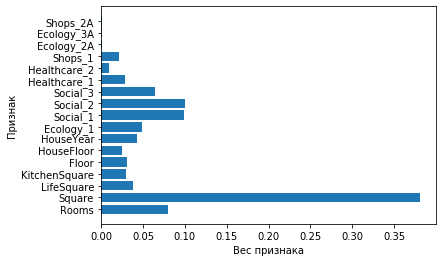

In [228]:
plt.barh(feature_names, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [229]:
feature_names_for_stand = [
    feature
    for feature, weight in zip(feature_names, rfr.feature_importances_.flatten())
    if np.abs(weight) > 0.01
]

print(feature_names_for_stand)

['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Shops_1']


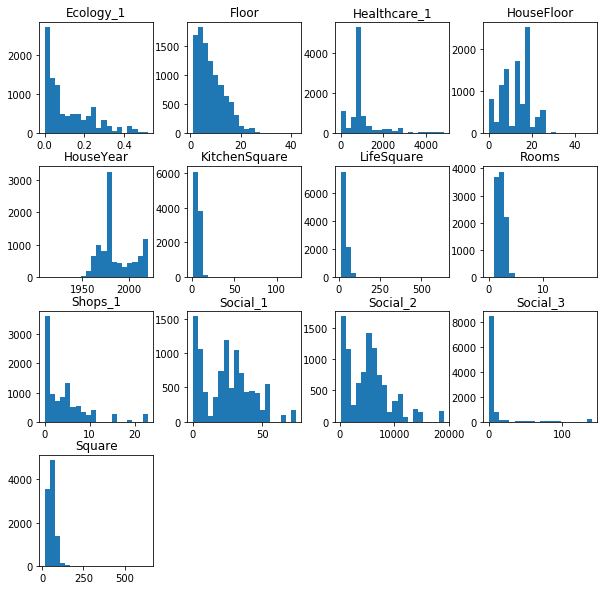

In [230]:
df_num_features = df[feature_names_for_stand]

df_num_features.hist(figsize=(10,10), bins=20, grid=False);

#### Дополнительная корректировка модели 

#### Подготовка и обучение модели

In [231]:
X = df[feature_names_for_stand]
y = df[['Price']]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9990 entries, 14038 to 6306
Data columns (total 13 columns):
Rooms            9990 non-null int32
Square           9990 non-null float64
LifeSquare       9990 non-null float64
KitchenSquare    9990 non-null float64
Floor            9990 non-null int64
HouseFloor       9990 non-null float64
HouseYear        9990 non-null float64
Ecology_1        9990 non-null float64
Social_1         9990 non-null int64
Social_2         9990 non-null int64
Social_3         9990 non-null int64
Healthcare_1     9990 non-null int32
Shops_1          9990 non-null int64
dtypes: float64(6), int32(2), int64(5)
memory usage: 1014.6 KB


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=400, random_state=42)

In [234]:
%%time

rfr.fit(X_train, y_train.values[:, 0])

Wall time: 51.3 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

#### Предсказание и анализ результатов

In [235]:
y_pred = rfr.predict(X_test)

In [236]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
Id,,,
13326,469497.535186,493015.706406,23518.171220
6733,182453.436044,195201.117096,12747.681052
5104,118939.006034,125307.323298,6368.317265
9371,229778.057902,144656.374737,-85121.683165
71,329629.767283,382201.504051,52571.736768


In [237]:
mean_squared_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

2201939964.8141513

In [238]:
mean_absolute_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

28179.59819869989

In [239]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.7507826147892906

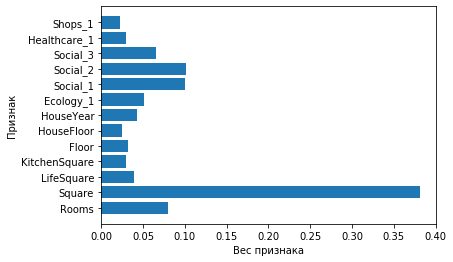

In [240]:
plt.barh(feature_names_for_stand, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [242]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [243]:
%%time

rfr.fit(X_train_scaled, y_train)

Wall time: 55.1 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

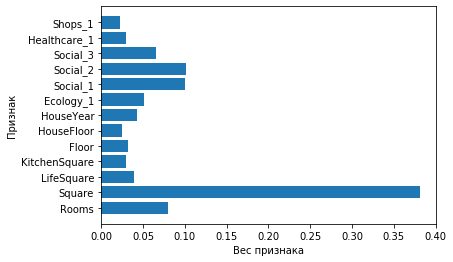

In [244]:
plt.barh(feature_names_for_stand, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [245]:
y_pred = rfr.predict(X_test_scaled)

In [246]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
Id,,,
13326,469497.535186,491451.390890,21953.855704
6733,182453.436044,185596.287494,3142.851450
5104,118939.006034,124672.298891,5733.292857
9371,229778.057902,148716.988297,-81061.069605
71,329629.767283,392233.820639,62604.053356


In [247]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.7183819505934947

Попробуем натянуть сетку

In [266]:
param_grid = {
    'bootstrap': [True],
    'max_depth': np.arange(50, 90),
    'max_features': np.arange(2, 5),
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500]
}

grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = param_grid, 
                           cv = 3
                          )


In [267]:
from sklearn import preprocessing
from sklearn import utils

In [268]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [269]:
%%time

grid_search.fit(X_train, y_train_encoded)

Wall time: 3min 32s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=400, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=1000, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90],
                         'max_feature

In [270]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}


In [271]:
y_pred = grid_search.predict(X_test)

In [272]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
Id,,,
13326,469497.535186,6701.541593,-462795.993593
6733,182453.436044,3442.340058,-179011.095986
5104,118939.006034,864.222812,-118074.783222
9371,229778.057902,1309.393049,-228468.664852
71,329629.767283,6390.031472,-323239.735811


In [273]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

-5.010420222701787

#### Проверка на перобучение

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [504]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [505]:
y_pred = lr.predict(X_test)

In [274]:
check_test_lr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test_lr["error"] = check_test_lr["y_pred"] - check_test_lr["y_test"]

check_test_lr.head()

,y_test,y_pred,error
Id,,,
13326,469497.535186,6701.541593,-462795.993593
6733,182453.436044,3442.340058,-179011.095986
5104,118939.006034,864.222812,-118074.783222
9371,229778.057902,1309.393049,-228468.664852
71,329629.767283,6390.031472,-323239.735811


In [275]:
mean_squared_error(check_test_lr["y_test"], check_test_lr["y_pred"])

53104579692.56279

In [276]:
mean_absolute_error(check_test_lr["y_test"], check_test_lr["y_pred"])

210986.5989349205

In [277]:
r2_score(check_test_lr["y_test"], check_test_lr["y_pred"]) 

-5.010420222701787

Вот, собссно, как-то так...